In [68]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>


In [69]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

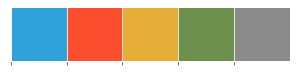

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import io
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords

def print_full(x):
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', None)
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')

class txtcol:
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.style.use('ggplot')

five_thirty_eight = [
    "#30a2da",
    "#fc4f30",
    "#e5ae38",
    "#6d904f",
    "#8b8b8b",
]

sns.set_palette(five_thirty_eight)
sns.palplot(sns.color_palette())

# Importing and Data Cleaning

In [71]:
appdata = pd.read_csv('/content/googleplaystore.csv')

In [72]:
appdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Upon using the info(), we found out that there's only one variable with numeric data type. We need to convert some of the variables which needs to be numeric, the variables are Reviews(number of reviews), Size, Installs, Price. The reason of them being non-numeric is that some of them include non-numeric characters such as '+', '$'. Let's explore the variables one by one

In [73]:
appdata.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

Here we have two observations, first that the sizes are given in Kilobytes and Megabytes. Keeping them in this format might cause us some trouble in the future, so we will convert them to a single unit i.e. bytes.
Second is the '1,000+' which needs to be investigated

In [74]:
appdata[appdata['Size'] == '1,000+']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


There's the culprit! Looking at this entry, it seems like that the variable values has been sifted to the left from 'Category' onwards. So we will choose to delete this entry.

In [75]:
appdata.drop(10472, inplace = True)

Continuing with the Size variable, we have to convert those into Bytes.

In [76]:
appdata['Size'] = appdata['Size'].apply(lambda x: x if x==0 else x.replace('M','0000'))
appdata['Size'] = appdata['Size'].apply(lambda x: x if x==0 else x.replace('k','000'))
appdata['Size'] = appdata['Size'].replace('Varies with device', 0)
appdata['Size'] = appdata['Size'].apply(lambda x: x if x==0 or float(x) > 100.00 else str(x.replace('.','')[:-(len(str(x.split('.')[0])))]))
appdata['Size'] = appdata['Size'].replace(0, np.NaN)
appdata['Size'] = appdata['Size'].apply(pd.to_numeric)
appdata.Size.unique()

array([ 190000.,  140000.,   87000.,  250000.,   28000.,   56000.,
        290000.,  330000.,   31000.,  280000.,  120000.,  200000.,
        210000.,  370000.,   27000.,   55000.,  170000.,  390000.,
        310000.,   42000.,   70000.,  230000.,   60000.,   61000.,
         46000.,   92000.,   52000.,  110000.,  240000.,      nan,
         94000.,  150000.,  100000.,   12000.,  260000.,   80000.,
         79000.,  560000.,  570000.,  350000.,  540000.,  201000.,
         36000.,   57000.,   86000.,   24000.,  270000.,   25000.,
        160000.,   34000.,   89000.,   39000.,   29000.,  380000.,
        320000.,   54000.,  180000.,   11000.,   22000.,   45000.,
         98000.,  520000.,   90000.,   67000.,  300000.,   26000.,
         71000.,   37000.,  220000.,   74000.,   64000.,   32000.,
         82000.,   99000.,   49000.,   95000.,   50000.,   59000.,
        130000.,  730000.,   68000.,   35000.,   40000.,   23000.,
         72000.,   21000.,  420000.,   73000.,   91000.,  5500

Now we have sorted the Size variable let's dig into Installs

In [77]:
appdata.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

As discussed above, the values has some commas and '+' sign in it. We may remove those.

In [78]:
appdata['Installs'] = appdata['Installs'].apply(lambda x: x.split('+')[0])
appdata['Installs'] = appdata['Installs'].apply(lambda x: x.replace(',', ''))
appdata['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [79]:
appdata['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

Price variable looks a bit cleaner and we will just have to remove the dollar sign

In [80]:
appdata['Price']  = appdata['Price'].apply(lambda x: x if x.isnumeric() else x.split('$')[1])

In [81]:
appdata['Installs'] = appdata['Installs'].apply(pd.to_numeric)
appdata['Reviews'] = appdata['Reviews'].apply(pd.to_numeric)
appdata['Price'] = appdata['Price'].apply(pd.to_numeric)
appdata['Price'] = appdata['Price'].replace(0, np.NaN)
appdata['Rating'] = appdata['Rating'].apply(pd.to_numeric)

Also, we will remove duplicates, if available

In [82]:
appdata = appdata.drop_duplicates(subset=['App'], keep = 'first')

#Missing Data

In [83]:
appdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   int64  
 6   Type            9658 non-null   object 
 7   Price           756 non-null    float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.0+ MB


After cleaning the variable, we must look into the missing data.
Rating and Size seems to have a large amount of data missing comparatively. Looking at the variables, the Rating is a very subjective variable and substituting a mean with missing data would not be ideal in this case, so we will rather drop those entries.

With the missing values in Size, we will subsitute those with the mean of that particular genre.

In [84]:
appdata.dropna(axis = 0, subset = ['Rating'], inplace = True)

In [85]:
appdata["Size"] = appdata.groupby("Genres")['Size'].transform(lambda x: x.fillna(x.mean()))
appdata['Size'] = appdata['Size'].apply(np.floor)
appdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8196 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8196 non-null   object 
 1   Category        8196 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         8196 non-null   int64  
 4   Size            8193 non-null   float64
 5   Installs        8196 non-null   int64  
 6   Type            8196 non-null   object 
 7   Price           604 non-null    float64
 8   Content Rating  8196 non-null   object 
 9   Genres          8196 non-null   object 
 10  Last Updated    8196 non-null   object 
 11  Current Ver     8192 non-null   object 
 12  Android Ver     8194 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 896.4+ KB


In [86]:
appdata['Last Updated'] = pd.to_datetime(appdata['Last Updated']) 
appdata

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,190000.0,10000,Free,NaN,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,140000.0,500000,Free,NaN,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,87000.0,5000000,Free,NaN,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,250000.0,50000000,Free,NaN,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,28000.0,100000,Free,NaN,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,26000.0,500,Free,NaN,Everyone,Education,2017-06-18,1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,530000.0,5000,Free,NaN,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,36000.0,100,Free,NaN,Everyone,Education,2018-07-06,1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,150936.0,1000,Free,NaN,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device


# Some Standard Stats About the Dataset

Now we will find out some of the basic stats about the Google App Store

In [87]:
app_count = appdata['App'].count()
print(txtcol.BOLD + 'Number of Apps in the Store: {}' .format(app_count) + txtcol.END)

Number of Apps in the Store: 8196


In [88]:
sum_reviews = appdata['Reviews'].sum()
print(txtcol.BOLD + 'Total number of Reviews Given: {}' .format(sum_reviews) + txtcol.END)

Total number of Reviews Given: 2092041054


In [89]:
sum_installs = appdata['Installs'].sum()
print(txtcol.BOLD + 'Total number of Installs: {}+' .format(sum_installs) + txtcol.END)

Total number of Installs: 75117075338+


In [90]:
avg_reviews = appdata['Reviews'].sum()/appdata['Installs'].sum()*100
print(txtcol.BOLD +'Average Percentage of Reviews Given: {:.2f}%' .format(avg_reviews) + txtcol.END ) 

Average Percentage of Reviews Given: 2.79%


In [91]:
avg_size = appdata['Size'].apply(pd.to_numeric).mean()
print(txtcol.BOLD +'Average Size of Application: {:.2f} Bytes' .format(avg_size) + txtcol.END )

Average Size of Application: 228965.23 Bytes


In [92]:
avg_price = appdata['Price'].apply(pd.to_numeric).mean()
print(txtcol.BOLD +'Average Price of Application: {:.2f} Dollars' .format(avg_price) + txtcol.END )

Average Price of Application: 14.08 Dollars


In [93]:
appdata2 = appdata.sort_values(['Reviews'], ascending=[False])[:50]
appdata2.sort_values('Rating', ascending = False)
appdata2 = appdata2.set_index('App')
print(txtcol.BOLD + 'Top 10 Highest Rated Apps:' + txtcol.END)
print(appdata2['Rating'].sort_values(ascending = False)[:10].to_markdown())

Top 10 Highest Rated Apps:
| App                                                |   Rating |
|:---------------------------------------------------|---------:|
| Clean Master- Space Cleaner & Antivirus            |      4.7 |
| Piano Tiles 2™                                     |      4.7 |
| Security Master - Antivirus, VPN, AppLock, Booster |      4.7 |
| Shadow Fight 2                                     |      4.6 |
| PhotoGrid: Video & Pic Collage Maker, Photo Editor |      4.6 |
| Dream League Soccer 2018                           |      4.6 |
| 360 Security - Free Antivirus, Booster, Cleaner    |      4.6 |
| Sniper 3D Gun Shooter: Free Shooting Games - FPS   |      4.6 |
| SHAREit - Transfer & Share                         |      4.6 |
| VivaVideo - Video Editor & Photo Movie             |      4.6 |


In [94]:
appdata2 = appdata.sort_values('Installs', ascending=False)[:10]
appdata2 = appdata2.set_index('App')
print(txtcol.BOLD + 'Top 10 Apps with Highest Number of Installs:' + txtcol.END)
print(appdata2['Installs'].sort_values(ascending = False)[:10].to_markdown())

Top 10 Apps with Highest Number of Installs:
| App                                      |   Installs |
|:-----------------------------------------|-----------:|
| Hangouts                                 |      1e+09 |
| Google+                                  |      1e+09 |
| Gmail                                    |      1e+09 |
| Google Chrome: Fast & Secure             |      1e+09 |
| WhatsApp Messenger                       |      1e+09 |
| Messenger – Text and Video Chat for Free |      1e+09 |
| Instagram                                |      1e+09 |
| Facebook                                 |      1e+09 |
| Google                                   |      1e+09 |
| Google News                              |      1e+09 |


#Data Visualization

After looking at the basic stats we got a basic idea of the App Store, now let's dig into the most beautiful part of an analysis DATA VISUALIZATION

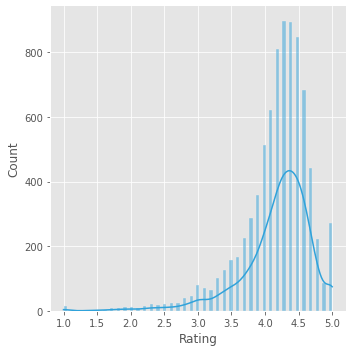

In [95]:
sns.displot(appdata['Rating'], kde=True)

Rating distribution is left skewed. Majority of apps seems to have rating around 3.5 to 4.5 

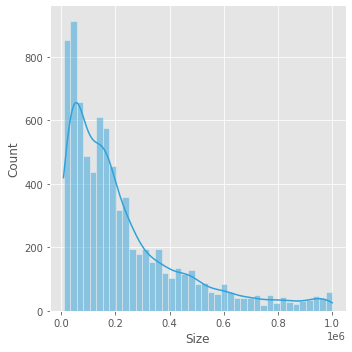

In [96]:
sns.displot(appdata['Size'], kde=True)

Observing this distribution plot, Number of apps decreases with increase in size. Let's look into Rating vs Size and Installs vs Size

Text(0.5, 0, 'Size')

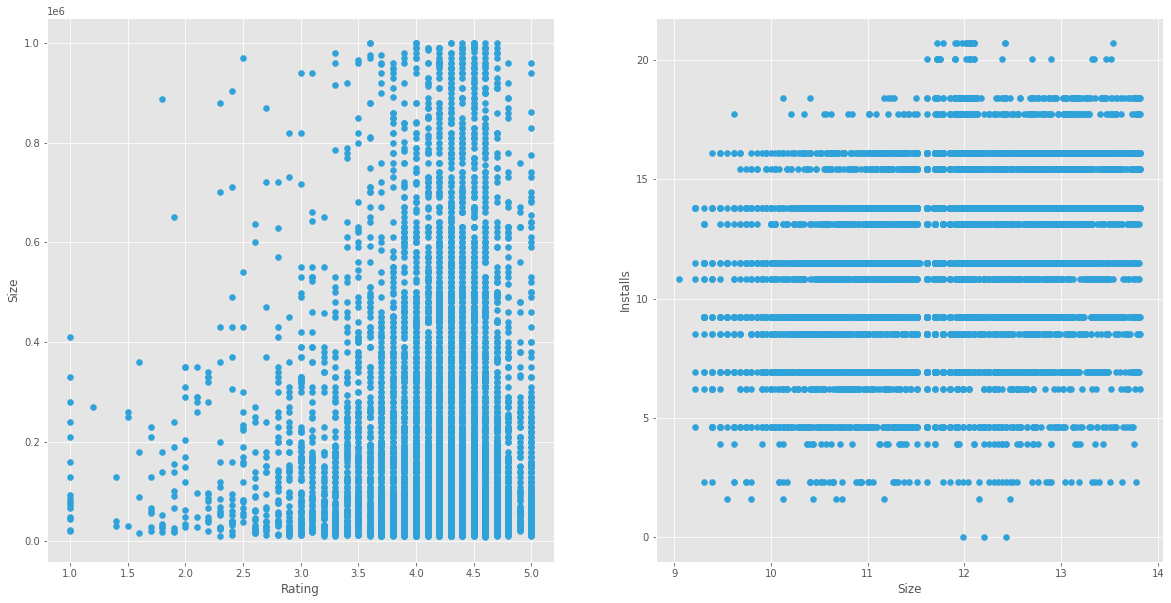

In [97]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].scatter(appdata['Rating'], appdata['Size'])
ax[0].set_xlabel('Rating')
ax[0].set_ylabel('Size')
ax[1].scatter(appdata['Size'].apply(np.log), appdata['Installs'].apply(np.log))
ax[1].set_ylabel('Installs')
ax[1].set_xlabel('Size')

Now this seems interesting, looking at the first plot. We can observe that as the size increases the number of rating decreases. App less than size of 400MB is crowded with ratings comparatively. So this explains that why developers must go with applications with lesser size

Now let's look at the average size of applications according to category

[Text(0.5, 0, 'Installs'), Text(0.5, 1.0, 'Installs according to Category')]

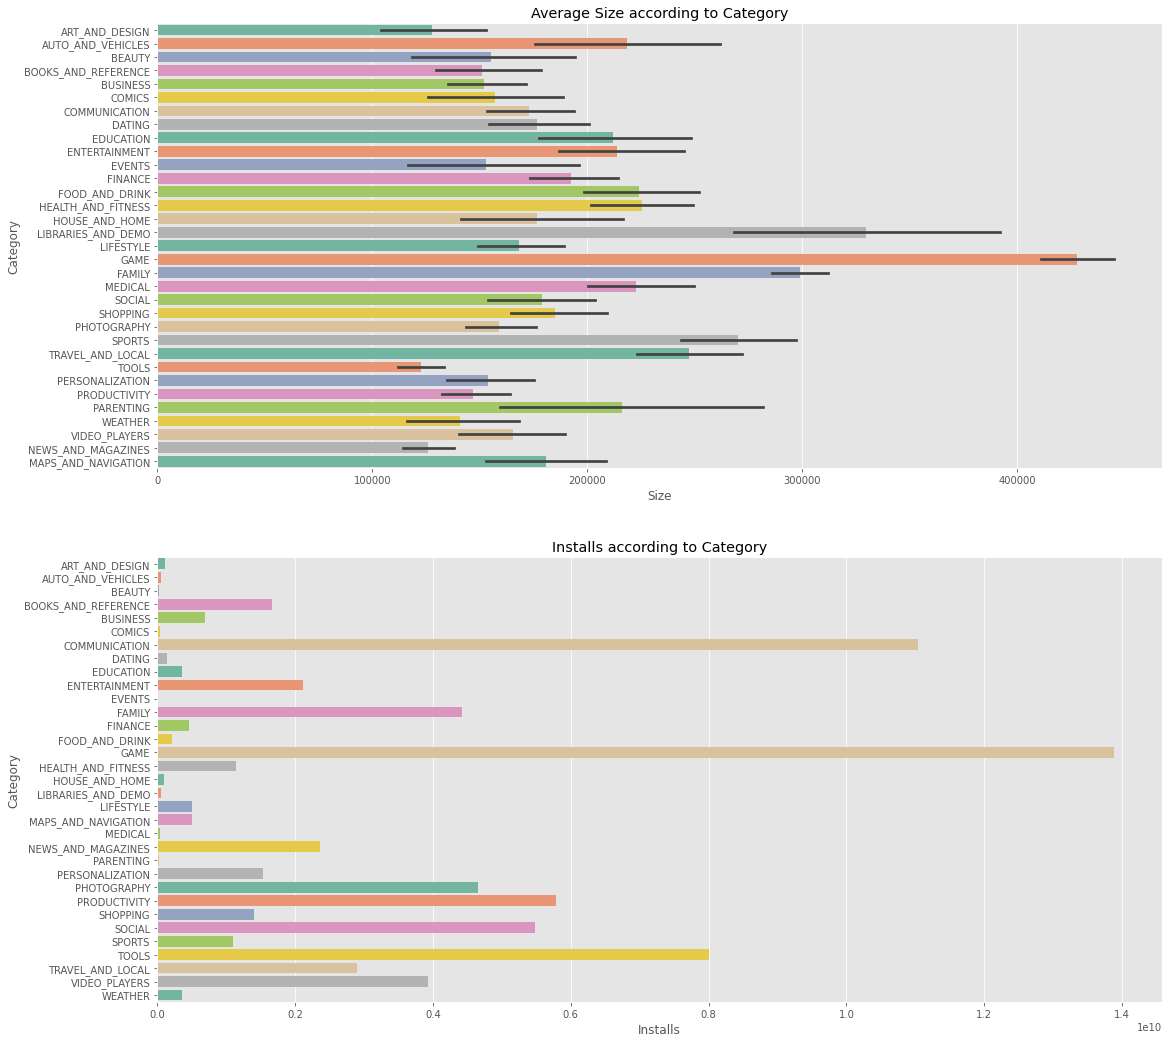

In [131]:
fig, ax = plt.subplots(2, 1, figsize=(18, 18))
sns.barplot(x = appdata['Size'], 
                 y = appdata['Category'], 
                 palette = 'Set2', ax = ax[0])
ax[0].set(title = 'Average Size according to Category')
sns.barplot(y = appdata.groupby('Category')['Installs'].sum().index, 
                 x = appdata.groupby('Category')['Installs'].sum().values, 
                 palette = 'Set2', ax = ax[1])
ax[1].set(title = 'Installs according to Category', xlabel = 'Installs')

This graph looks interesting, we can observe that average size of an application in Game category is highest(which is expected). With tools with the lowest average size

There's the twist! Not as great a twist like in a Nolan movie, but the Game category has most numbers of Installs despite having highest average size!. As we had discovered some basics stats of apps with highest installs, there was not a single app with Game category! Let's find out the reason.

Let's look into the average installs according to category to and I expect to not see Game category topping the list.

[Text(0.5, 0, 'Installs'),
 Text(0.5, 1.0, 'Average Installs According to Category')]

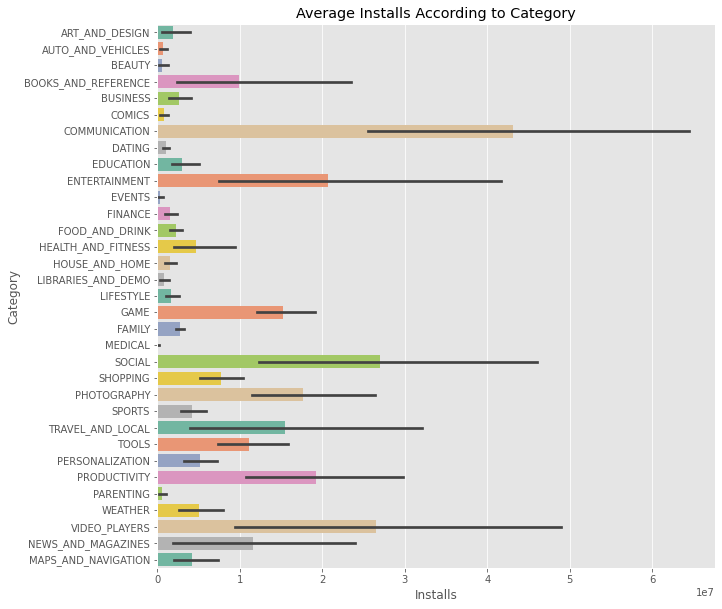

In [132]:
fig = plt.subplots(figsize=(10, 10))
ax = sns.barplot(x = appdata['Installs'], 
                 y = appdata['Category'], 
                 palette = 'Set2')
ax.set(xlabel = 'Installs', title = 'Average Installs According to Category')

And that's how you do a prediction! Haha. Jokes aside, The game category is way down, not even in top 3. With communication topping the list, this explains that people do use their phones for what they were intended to. This also concludes that people tend to download multiple apps or large amount of apps from Game category in their mobile phones compared to Communication and Social. Assuming this, I expect games to have the most number of apps. Let's figure it out.

[Text(0.5, 0, 'Number of Apps'),
 Text(0.5, 1.0, 'Number of Apps According to Category')]

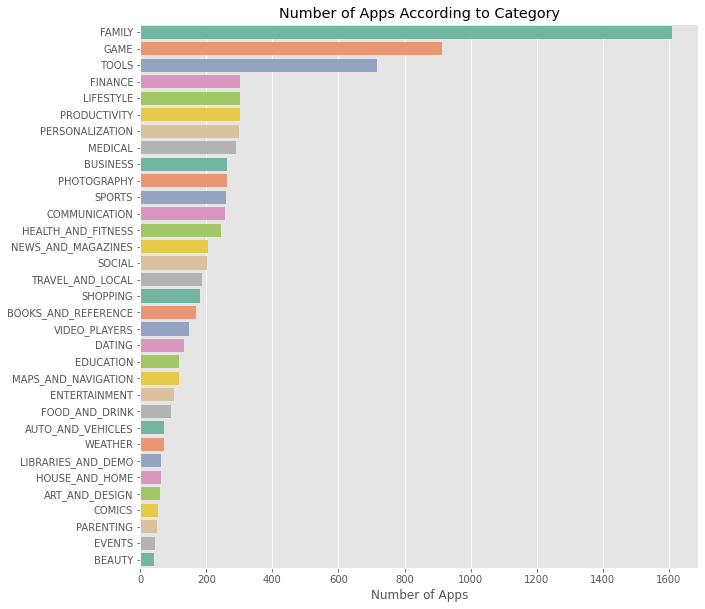

In [100]:
fig = plt.subplots(figsize=(10, 10))
ax = sns.barplot(x = appdata['Category'].value_counts().values, 
                 y = appdata['Category'].value_counts().index, 
                 palette = 'Set2')
ax.set(xlabel = 'Number of Apps', title = 'Number of Apps According to Category')

Now this is something strange, suddenly Family category has come into the picture. Despite having most number of apps in the category, almost double of the second(Game) category it is nowhere near in terms of number of installs. Most probably Family category is populated with similar kinds of apps. Also something noticable about Communication is that despite being second in most number of installs the number of apps way less compared to other categories this says a lot about the quality of apps produced in this category

Another similar kind of category to Family is Medical, it is listed in the top 10 highest number of apps list but has the least installs. So there seems to be a lot apps of poor quality and there's an opportunity/scope to build/produce an app in that category

Now that both Family, Medical has caught our eyes let's try building a word cloud of words used in name of apps in Game, Communication, Tools, Family, Social and Medical category.

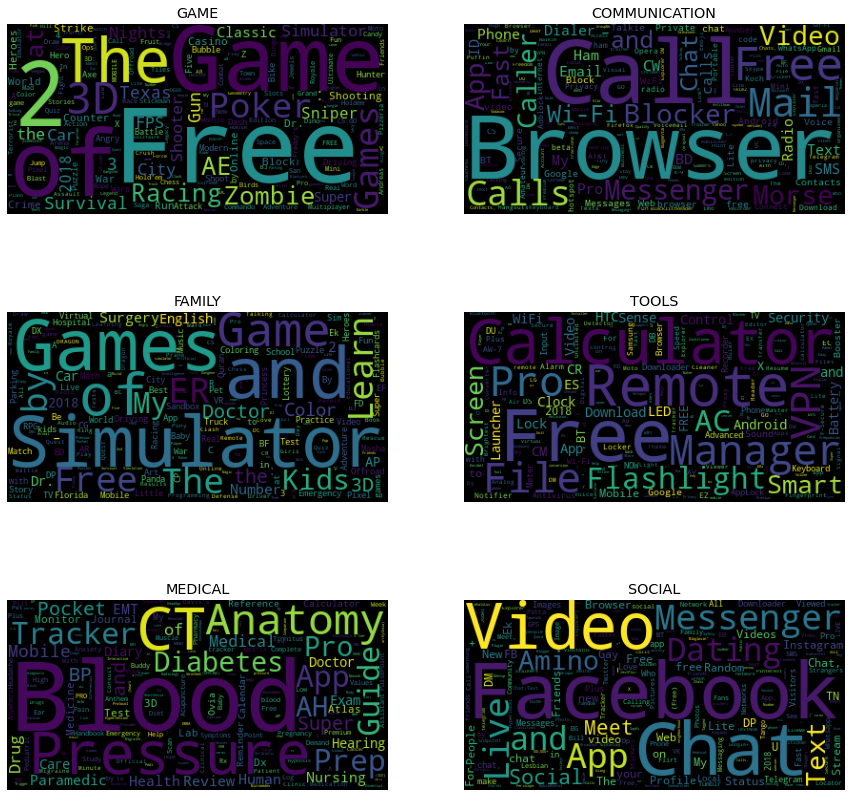

In [101]:

fig = plt.subplots(figsize=(15, 15))
cat = ['GAME','COMMUNICATION','FAMILY', 'TOOLS','MEDICAL', 'SOCIAL']
for index, item in enumerate(cat):
  app_name = appdata.groupby('Category').get_group(item)['App']
  word_counter = Counter()
  for app in app_name:
    word_counter.update(app.split(' '))
  word_counter = dict(word_counter)
  stop_words = ['&','-', 'for']
  for i in stop_words:
    del word_counter[i] 
  wc = WordCloud(stopwords = ['&','-', '_', '& '], relative_scaling=0).generate_from_frequencies(word_counter)
  plt.subplot(3,2, index+1)
  plt.imshow(wc)
  plt.axis("off")
  plt.title(item)
plt.show()

If we focus on the Family category, we see that there are apps with Game as a Genre. So this was something strange from the graph. 

Now, Before going into the Ratings part let's give a look to the number of reviews given per category

[Text(0.5, 0, 'Number of Reviews'),
 Text(0.5, 1.0, 'Number of Reviews Recieved According to Category')]

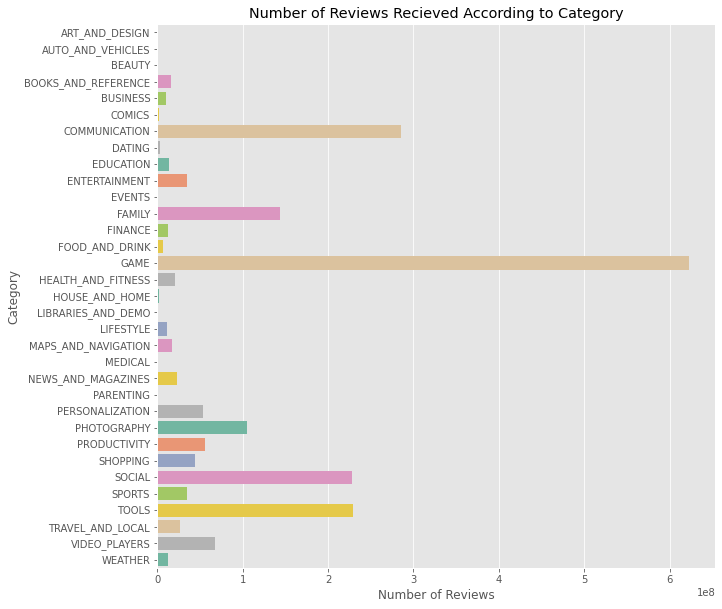

In [102]:
fig = plt.subplots(figsize=(10, 10))
ax = sns.barplot(y = appdata.groupby('Category')['Reviews'].sum().index, 
                 x = appdata.groupby('Category')['Reviews'].sum().values,
                 palette = 'Set2')
ax.set(xlabel = 'Number of Reviews', title = 'Number of Reviews Recieved According to Category')

This plot also follows the similar trend as installs with Game and Communication topping the list followed by Social and Tools. Now this is the perfect opportunity to look into the Installs vs Reviews Scatter.

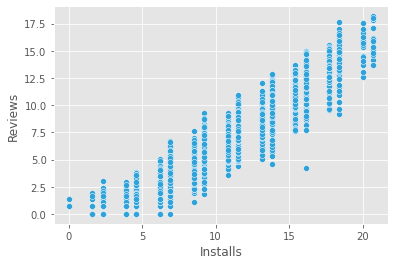

In [103]:
sns.scatterplot(y= appdata['Reviews'].apply(np.log), x = appdata['Installs'].apply(np.log))

So there aren't much surprises in this graph, it follows a truly linear relationship which was expected. Moving forward.

Now let's dig into the Ratings part again. Below is the box plot of the ratings arranged according to the categories

[Text(0.5, 0, 'Rating'),
 Text(0.5, 1.0, 'Box Plot of Rating according to Category')]

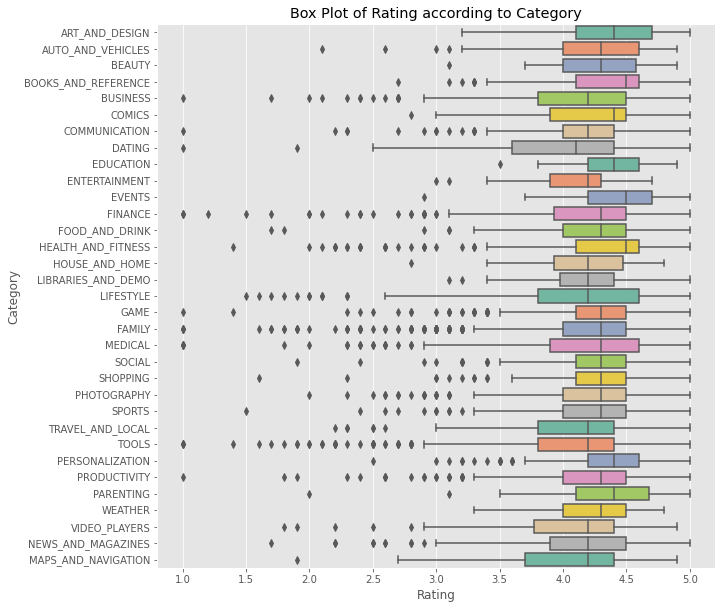

In [104]:
fig = plt.subplots(figsize=(10, 10))
ax = sns.boxplot(x = appdata['Rating'], 
                 y = appdata['Category'], 
                 palette = 'Set2')
ax.set(xlabel = 'Rating', title = 'Box Plot of Rating according to Category')

As we observed above the communication category had the highest average installs count. And depiste having highest average install counts the rating box is not widely spread as most of the apps in this category has ratings more than 3.2(excluding the outliers). Game  category ratings are even better with most apps rated above 3.5

The 3 categories that caught my eyes were Dating, Lifestyle and Maps_and_Navigation. The ratings for those category are varied and people might have mixed experiences with those apps. Also there are some categories which don't have full Rating(5) those might be the categories investers might be interested in.

Now let's dig into the Pricing category.

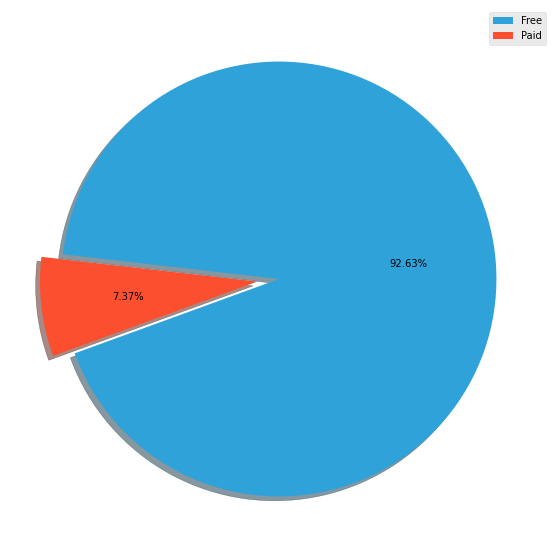

In [105]:
fig = plt.figure(figsize = (10,10))
plt.pie(appdata['Type'].value_counts().values, autopct='%1.2f%%', shadow=True, 
        explode = (0, 0.1), startangle= -160)
plt.legend(labels = appdata['Type'].value_counts().index)
plt.show()

So, almost 93% of apps are free. Let's look at the price distribution of the apps

Now let's divide the price into 4 categories 


* less than 0.99 = Cheap
* 1 to 4.99 = Affordable
* 5 to 9.99 = Expensive
* more than 10 Very Expensive



[Text(0.5, 0, 'Rating'), Text(0.5, 1.0, 'App according to their Prices')]

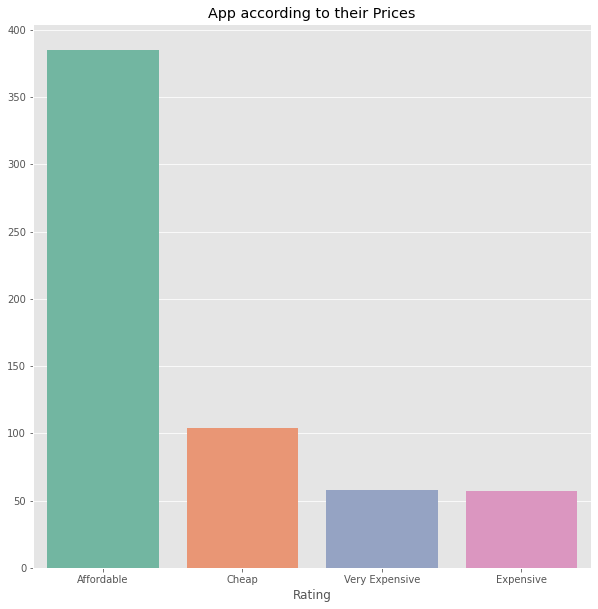

In [106]:
def price_cat(price):
    try:
        if  price <= 0.99:
            return 'Cheap'
        elif price >= 1 and price <=4.99:
            return 'Affordable'
        elif price >= 5 and price <=9.99:
            return 'Expensive'
        elif price >= 10:
            return 'Very Expensive'
    except ValueError as error:
        return 'none'
appdata['Price_Type'] = appdata['Price'].apply(price_cat)
fig = plt.subplots(figsize=(10, 10))
ax = sns.barplot(x = appdata['Price_Type'].value_counts().index, 
                 y = appdata['Price_Type'].value_counts().values, 
                 palette = 'Set2')
ax.set(xlabel = 'Rating', title = 'App according to their Prices')

So most of the apps in the market are in the adffordable section. Now let's see the average app installs according to app category

[Text(0.5, 0, 'Installs'),
 Text(0.5, 1.0, 'Average Installs according to Price Type')]

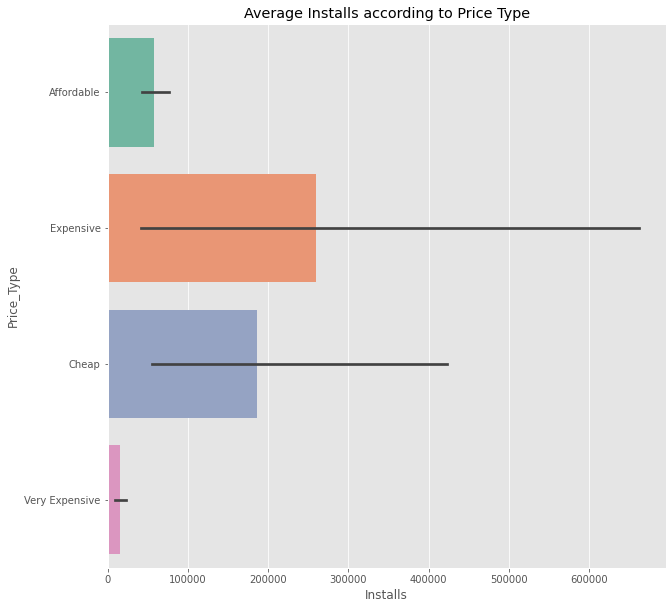

In [107]:
fig = plt.subplots(figsize=(10, 10))
ax = sns.barplot(x = appdata['Installs'], 
                 y = appdata['Price_Type'], 
                 palette = 'Set2')
ax.set(xlabel = 'Installs', title = 'Average Installs according to Price Type')

That's something interesting, Expensive category has the most number of average app installs.This says that investers/developers can price their apps under 10 Dollars. Let's look at the average ratings.  

[Text(0.5, 0, 'Installs'),
 Text(0.5, 1.0, 'Average Ratings according to Price Type')]

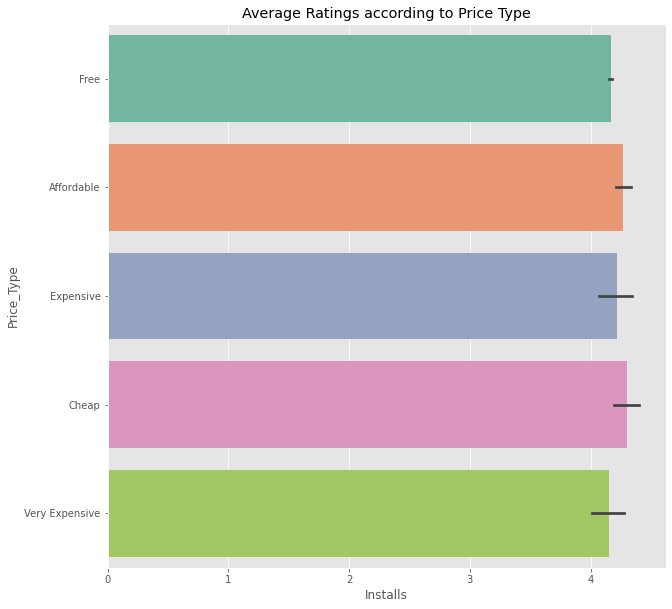

In [108]:
appdata['Price_Type'] = appdata['Price_Type'].transform(lambda x: x.fillna('Free'))
fig = plt.subplots(figsize=(10, 10))
ax = sns.barplot(x = appdata['Rating'], 
                 y = appdata['Price_Type'], 
                 palette = 'Set2')
ax.set(xlabel = 'Installs', title = 'Average Ratings according to Price Type')

That's impressive. So one thing is clear that Paid apps are slightly rated higher than Free. But the average ratings of Very Expensive Apps are lower than Free apps. So there's a point to takeaway that apps price more than 10 Dollars are usually not brought and rated higher.

Now let's have a look at Content Rating.

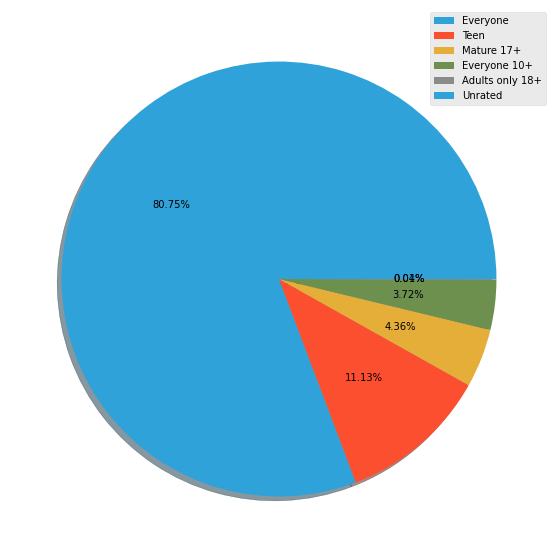

In [109]:
fig = plt.figure(figsize = (10,10))
plt.pie(appdata['Content Rating'].value_counts().values, autopct='%1.2f%%', 
        shadow=True)
plt.legend(labels = appdata['Content Rating'].value_counts().index)
plt.show()

This tells that playstore is majorly populated with Apps that everyone can use there are only a few apps that are strictly for 18+ Adults.

Let's have a look at average rating according to Content Rating

[Text(0.5, 0, 'Rating'),
 Text(0.5, 1.0, 'Average Ratings according to Content Rating')]

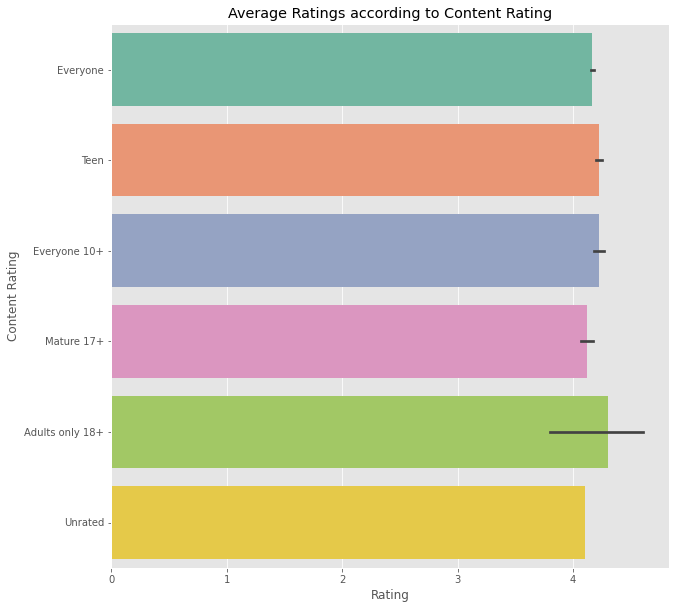

In [110]:
appdata['Price_Type'] = appdata['Price_Type'].transform(lambda x: x.fillna('Free'))
fig = plt.subplots(figsize=(10, 10))
ax = sns.barplot(x = appdata['Rating'], 
                 y = appdata['Content Rating'], 
                 palette = 'Set2')
ax.set(xlabel = 'Rating', title = 'Average Ratings according to Content Rating')

Now let's look at the updating trend of Top 4 categories with most apps and Communication and Social category. 

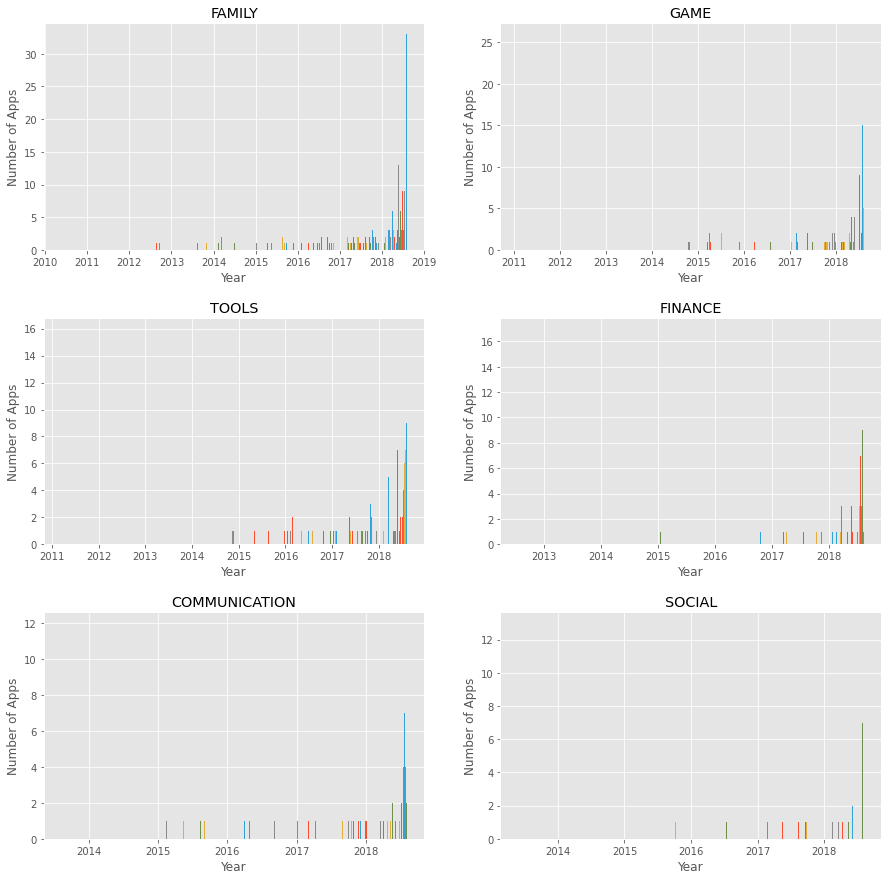

In [129]:
l = ['FAMILY', 'GAME', 'TOOLS', 'FINANCE', 'COMMUNICATION', 'SOCIAL']
fig, ax= plt.subplots(3, 2, figsize = (15,15))
ax = ax.ravel()
for index, item in enumerate(l):
  ax[index].bar(appdata.groupby('Category').get_group(item)['Last Updated'].value_counts().index, 
        appdata.groupby('Category').get_group(item)['Last Updated'].value_counts().values, 
        color = five_thirty_eight)
  plt.subplots_adjust(hspace = 0.3)
  ax[index].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
  ax[index].set(xlabel= 'Year', ylabel='Number of Apps', title = item)
plt.show()

We can observe that Apps in family categories are recently updated there are also a few apps which haven't been updated since 2012. The trend of Games seems to have started from 2015. Apps in social category are also not updated very frequently.